<a href="https://colab.research.google.com/github/shifafakruddin/ML-project-/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing libraries


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTENC, SMOTEN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

##DATA PREPROCESSING

In [ ]:
df_raw= pd.read_csv("/content/Credit_card.csv")

In [ ]:
df_credit_raw = pd.read_csv("/content/Credit_card_label.csv", encoding = 'utf-8')

In [ ]:
df=df_raw.copy()

In [ ]:
df_credit=df_credit_raw.copy()

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df_credit.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
print('For the first table, number of unique ID',df['Ind_ID'].nunique())
print('For the second table, number of unique ID',df_credit['Ind_ID'].nunique())
print('Number of unique customer ID that appearing in both tables:',df[df['Ind_ID'].isin(df_credit['Ind_ID'])]['Ind_ID'].nunique())

For the first table, number of unique ID 1548
For the second table, number of unique ID 1548
Number of unique customer ID that appearing in both tables: 1548


In [ ]:
df.shape

(1548, 18)

In [ ]:
df_credit.shape

(1548, 2)

In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
df_credit.isnull().sum()

Ind_ID    0
label     0
dtype: int64

In [ ]:
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [ ]:
df.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [ ]:
join_data = pd.merge(df,df_credit)
join_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
join_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

###Set DAYS_BIRTH, DAYS_EMPLOTED to a more appropriate format

In [ ]:
join_data[join_data['Birthday_count']==0]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [ ]:
join_data['Birthday_count'] = join_data['Birthday_count'].fillna(0)

In [ ]:
join_data['Birthday_count'] = round(join_data['Birthday_count']/-365,0)
join_data.rename(columns={'Birthday_count':'AGE'}, inplace=True)

In [ ]:
join_data[join_data['Employed_days']>0]['Employed_days'].unique()

array([365243])

In [ ]:
# As mentioned in document, if 'Employed_days' is positive no, it means person currently unemployed, hence replacing it with 0
join_data['Employed_days'].replace(365243, 0, inplace=True)

In [ ]:
join_data['Employed_days'] = abs(round(join_data['Employed_days']/-365,0))
join_data.rename(columns={'Employed_days':'YEAR_EMPLOYED'}, inplace=True)

In [ ]:
join_data= join_data.reset_index(drop=True)

In [ ]:
 # Calculate the mean value of the column, rounded to the nearest integer
mean_value = round(join_data[join_data['AGE'] != 0]['AGE'].mean())

# Replace zeros with the mean value
join_data['AGE'] = join_data['AGE'].replace(0, mean_value)


In [ ]:
# Example using scikit-learn's LinearRegression
from sklearn.linear_model import LinearRegression

# Split your data into two sets: one with missing 'Annual Income' and one without
df_missing = join_data[join_data['Annual_income'].isnull()]
df_not_missing = join_data[~join_data['Annual_income'].isnull()]

# Fit a regression model
model = LinearRegression()
model.fit(df_not_missing[['AGE','YEAR_EMPLOYED']], df_not_missing['Annual_income'])

# Predict missing values
predicted_incomes = model.predict(df_missing[['AGE','YEAR_EMPLOYED']])

# Round predicted incomes to integers
predicted_incomes = predicted_incomes.round().astype(int)

# Fill missing values with predicted values
join_data.loc[join_data['Annual_income'].isnull(), 'Annual_income'] = predicted_incomes

In [ ]:
join_data['GENDER'].fillna(join_data['GENDER'].mode()[0],inplace=True)

In [ ]:
join_data.loc[join_data["Type_Income"]=="Pensioner","Type_Occupation"] = "Pensioner"

In [ ]:
join_data.isna().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
AGE                  0
YEAR_EMPLOYED        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    224
Family_Members       0
label                0
dtype: int64

In [ ]:
join_data['Type_Occupation'].fillna('Unknown', inplace=True)

In [ ]:
join_data.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
AGE                0
YEAR_EMPLOYED      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

###Visualization

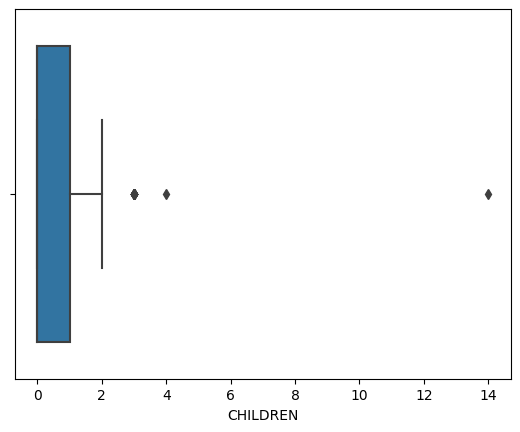

In [ ]:
#create plot to detect outliers
sns.boxplot(x=join_data['CHILDREN'])
plt.xlabel('CHILDREN')
plt.show()

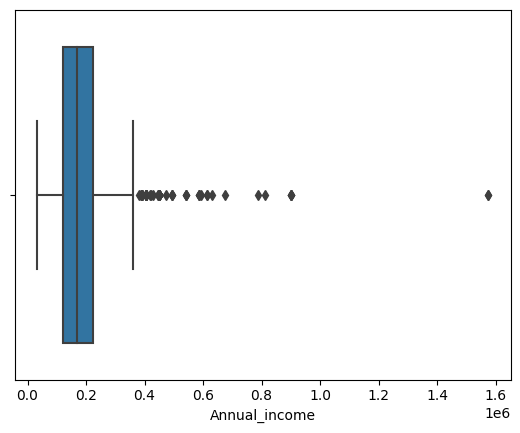

In [ ]:
#create plot to detect outliers
sns.boxplot(x=join_data['Annual_income'])
plt.xlabel('Annual_income')
plt.show()

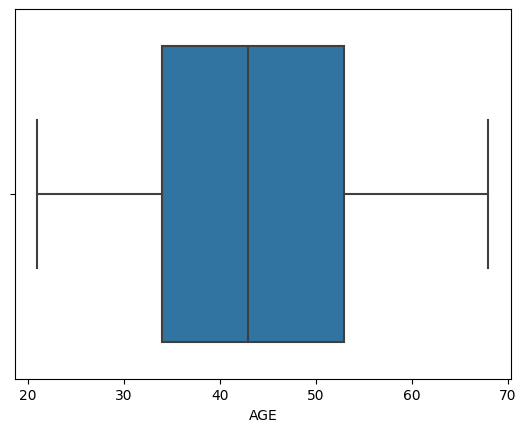

In [ ]:
#create plot to detect outliers
sns.boxplot(x=join_data['AGE'])
plt.xlabel('AGE')
plt.show()

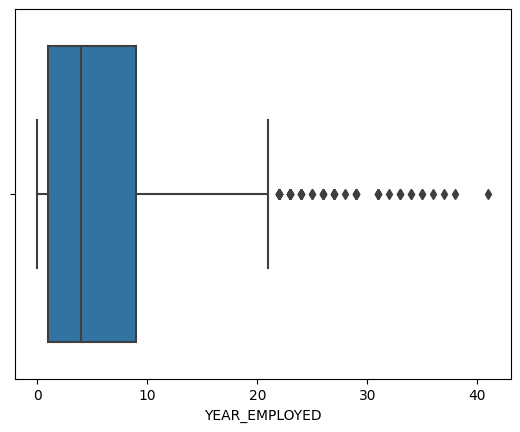

In [ ]:
#create plot to detect outliers
sns.boxplot(x=join_data['YEAR_EMPLOYED'])
plt.xlabel('YEAR_EMPLOYED')
plt.show()

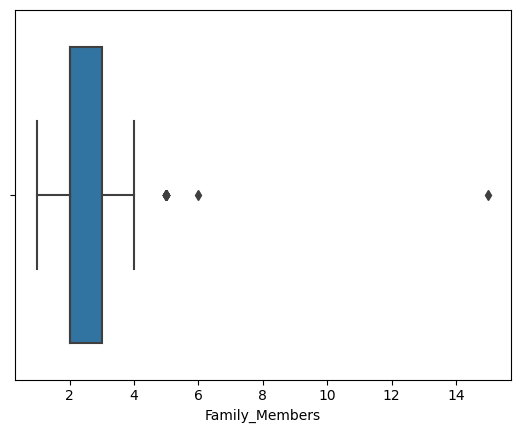

In [ ]:
#create plot to detect outliers
sns.boxplot(x=join_data['Family_Members'])
plt.xlabel('Family_Members')
plt.show()

###Treating  Outliers

In [ ]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = []

    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)

    return outliers

# 'join_data' is a DataFrame with a 'CHILDREN' column
# You can extract the 'CHILDREN' column and pass it to the function
children_column = join_data['CHILDREN']
outliers = detect_outliers_iqr(children_column)

print("Outliers from IQR method in the 'CHILDREN' column:")
print(outliers)


Outliers from IQR method in the 'CHILDREN' column:
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 14]


###Median Imputation

In [ ]:
# Calculate the median of the outliers
median_of_outliers = np.median(outliers)

# Replace outliers in the 'CHILDREN' column with the median
join_data['CHILDREN'] = join_data['CHILDREN'].apply(lambda x: median_of_outliers if x in outliers else x)


In [ ]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = []

    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)

    return outliers

Annual_income_column = join_data['Annual_income']

# Detect outliers
outliers = detect_outliers_iqr(Annual_income_column)

# Calculate the median of the outliers
median_of_outliers = np.median(outliers)

# Replace outliers in the 'Annual_income' column with the median
join_data['Annual_income'] = join_data['Annual_income'].apply(lambda x: median_of_outliers if x in outliers else x)



In [ ]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = []

    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)

    return outliers

YEAR_EMPLOYED_column = join_data['YEAR_EMPLOYED']

# Detect outliers
outliers = detect_outliers_iqr(YEAR_EMPLOYED_column)

# Calculate the median of the outliers
median_of_outliers = np.median(outliers)

# Replace outliers in the 'YEAR_EMPLOYED' column with the median
join_data['YEAR_EMPLOYED'] = join_data['YEAR_EMPLOYED'].apply(lambda x: median_of_outliers if x in outliers else x)

In [ ]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = []

    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)

    return outliers

Family_Members_column = join_data['Family_Members']

# Detect outliers
outliers = detect_outliers_iqr(Family_Members_column)

# Calculate the median of the outliers
median_of_outliers = np.median(outliers)

# Replace outliers in the 'Family_Members' column with the median
join_data['Family_Members'] = join_data['Family_Members'].apply(lambda x: median_of_outliers if x in outliers else x)

###Feature Selection

In [ ]:
join_data["Mobile_phone"].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [ ]:
# As all the values in column are 1, hence dropping column
join_data = join_data.drop('Mobile_phone',axis=1)

In [ ]:
join_data['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
join_data.drop('Work_Phone', axis=1, inplace=True)

In [ ]:
join_data['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
join_data.drop('Phone', axis=1, inplace=True)

In [ ]:
join_data['EMAIL_ID'].value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
join_data.drop('EMAIL_ID', axis=1, inplace=True)

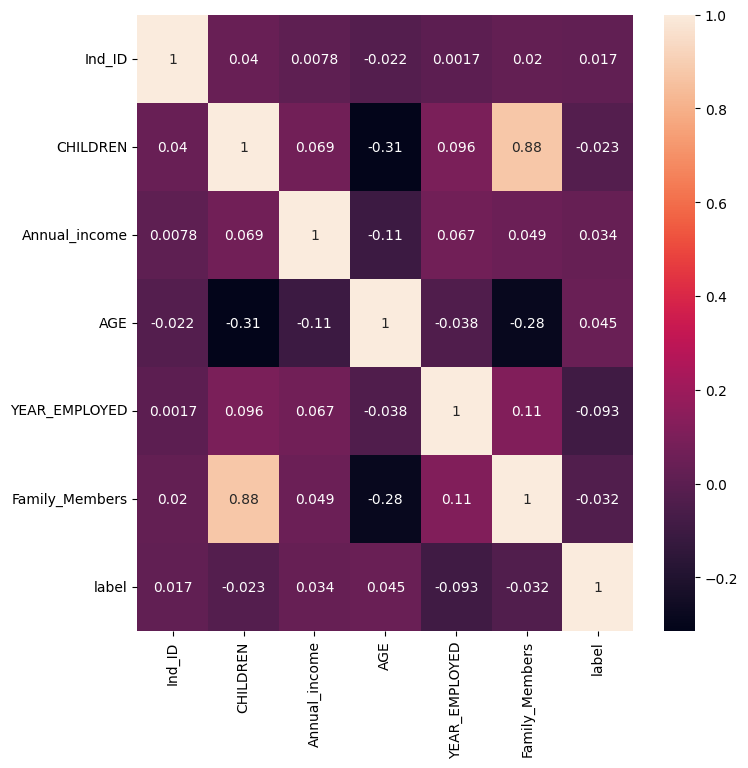

In [ ]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'label'
plt.figure(figsize = (8,8))
sns.heatmap(join_data.corr(numeric_only=True), annot=True)

plt.show()

CHILDREN(Number of children) and Family_Members (Number of family member)

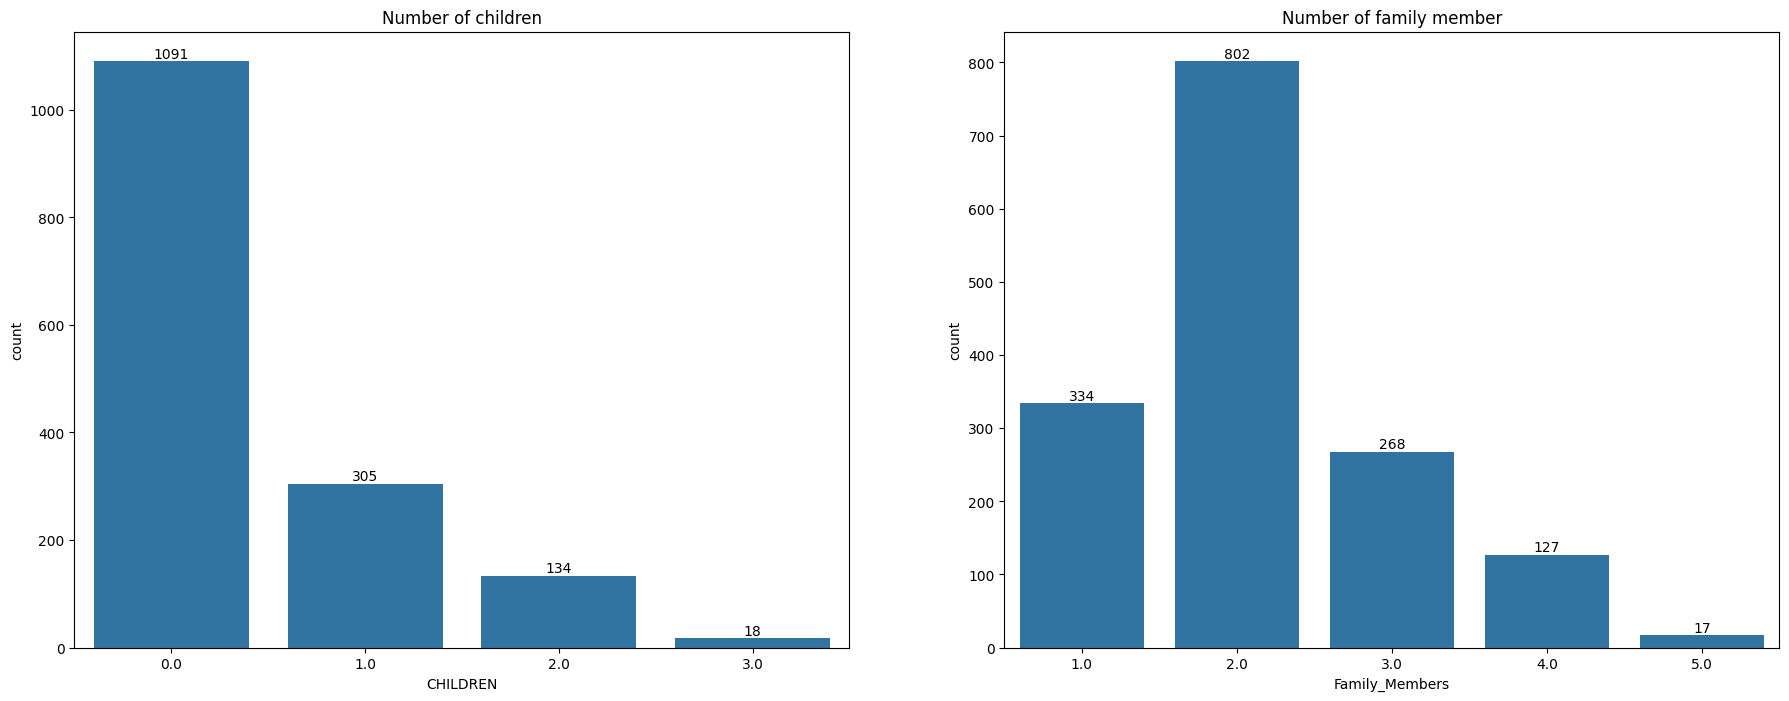

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
cplot = sns.countplot(data=join_data, x="CHILDREN", ax=ax[0],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[0].set_title('Number of children')

cplot = sns.countplot(data=join_data, x="Family_Members", ax=ax[1],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[1].set_title('Number of family member')
plt.show()

There is clearly outliers on both number of children and family member. The distribution of number of family greater than 1 is exactly the same as the distribution of number of children. This shows that these two features are highly correlated.

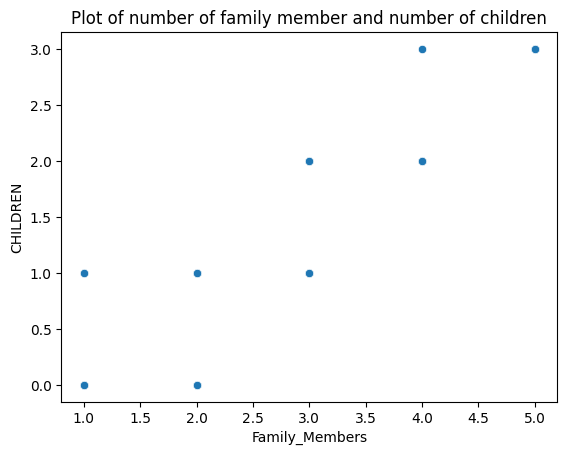

In [ ]:
sns.scatterplot(data=join_data, x="Family_Members",y="CHILDREN")
plt.title('Plot of number of family member and number of children')
plt.show()

In [ ]:
join_data[["CHILDREN","Family_Members"]].corr()

,CHILDREN,Family_Members
CHILDREN,1.000000,0.876728
Family_Members,0.876728,1.000000


The plot of number of family member and number of children and correlation table confirm the correlation. As the number of family member cover the number of children, we chose to drop the number of children feature.

In [ ]:
join_data = join_data.drop("CHILDREN",axis=1)

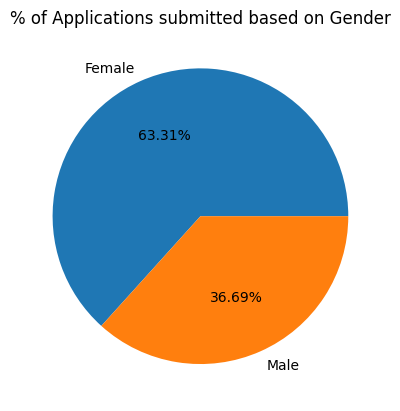

In [ ]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(join_data['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

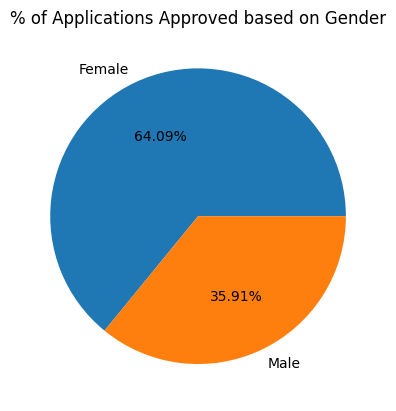

In [ ]:
# This graph shows that, majority of application are approved for Female's
plt.pie(join_data[join_data['label']==0]['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

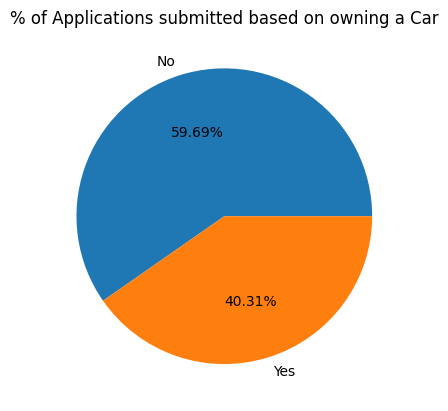

In [ ]:
# This graph shows that, majority of applicatant's don't own a car
plt.pie(join_data['Car_Owner'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

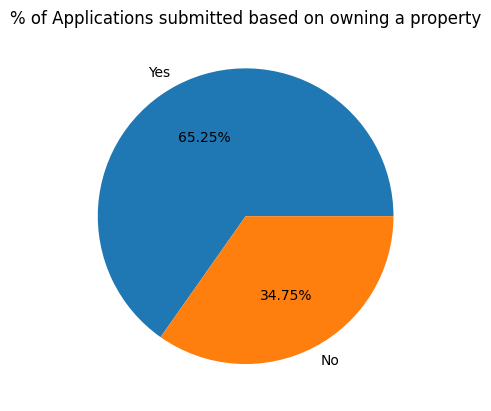

In [ ]:
# This graph shows that, majority of applicatant's own a property / House
plt.pie(join_data['Propert_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a property')
plt.show()

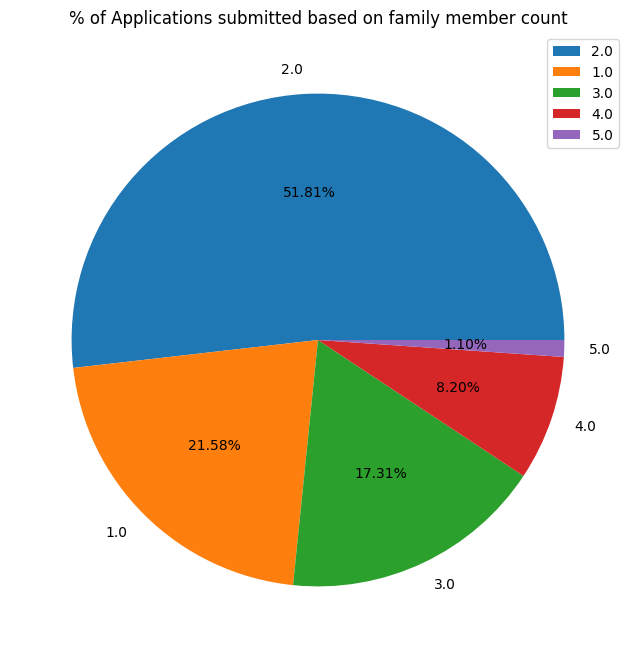

In [ ]:
# This graph shows that, majority of applicatant's have 2 members in family
plt.figure(figsize = (8,8))
plt.pie(join_data['Family_Members'].value_counts(), labels=join_data['Family_Members'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on family member count')
plt.legend()
plt.show()

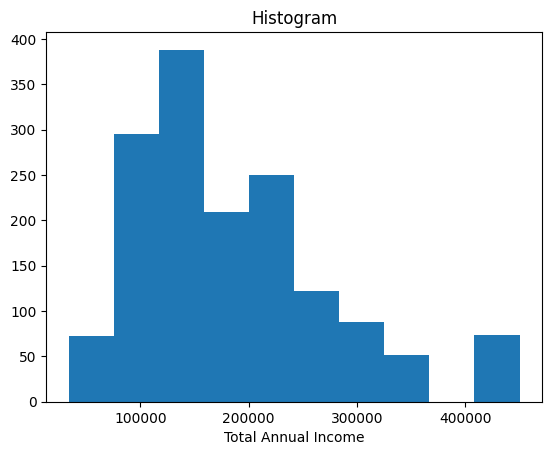

In [ ]:
# This graph shows that, majority of applicatant's income lies between 50k to 25 lakh
plt.hist(join_data['Annual_income'], bins=10)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

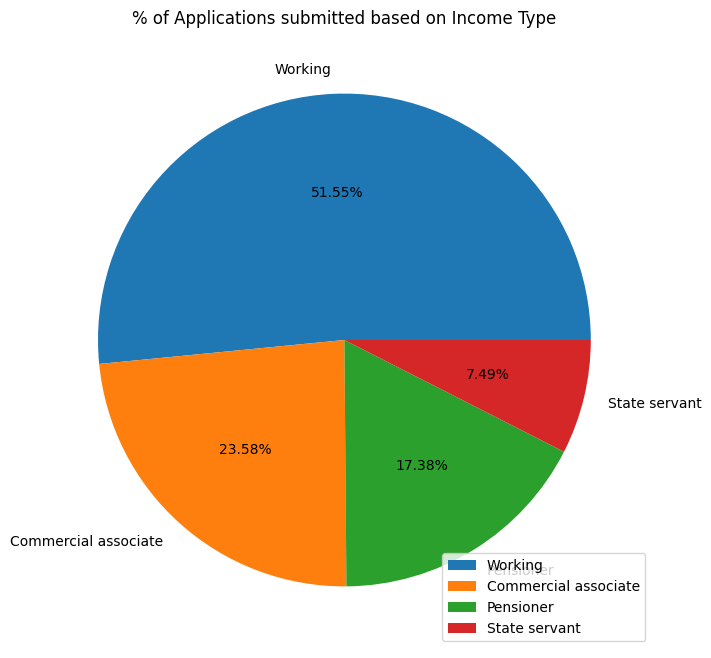

In [ ]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(join_data['Type_Income'].value_counts(), labels=join_data['Type_Income'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

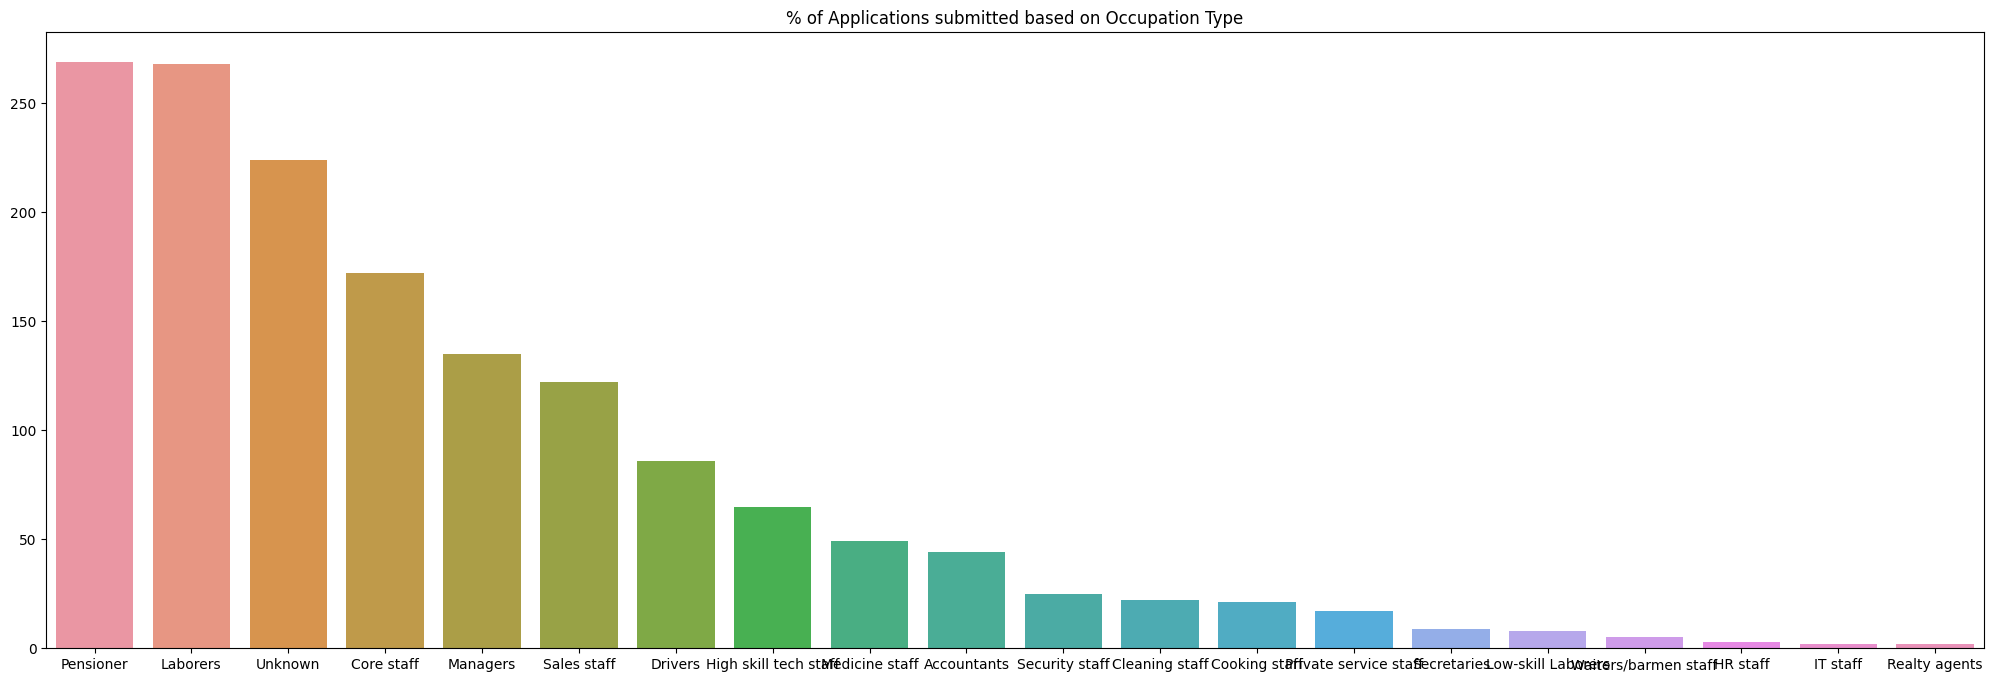

In [ ]:
# This graph shows that the majority of applicants are pensioner and laborers
plt.figure(figsize=(25,8))
sns.barplot(x=join_data['Type_Occupation'].value_counts().index, y=join_data['Type_Occupation'].value_counts().values)
plt.title('% of Applications submitted based on Occupation Type')
plt.show()

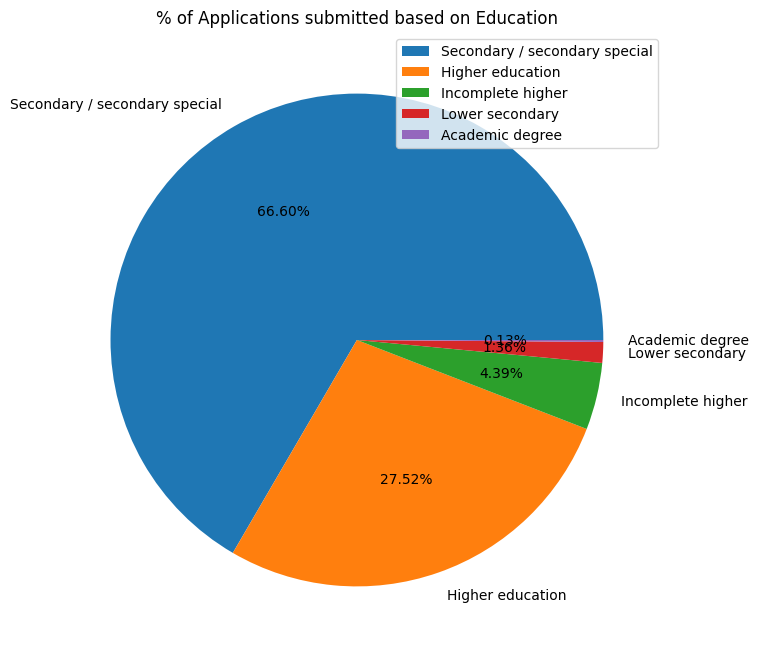

In [ ]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(join_data['EDUCATION'].value_counts(), labels=join_data['EDUCATION'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

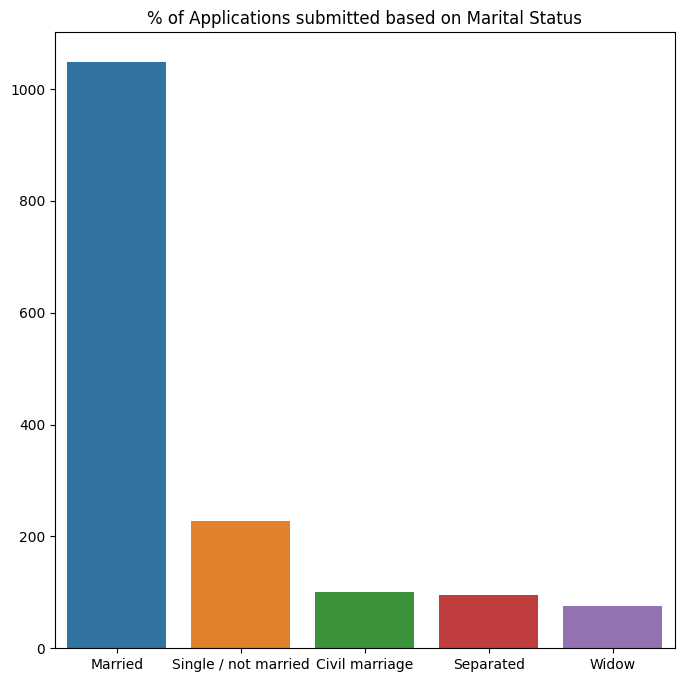

In [ ]:
# This graph shows that the majority of applicants are married
plt.figure(figsize=(8, 8))
sns.barplot(x=join_data['Marital_status'].value_counts().index, y=join_data['Marital_status'].value_counts().values)
plt.title('% of Applications submitted based on Marital Status')
plt.show()


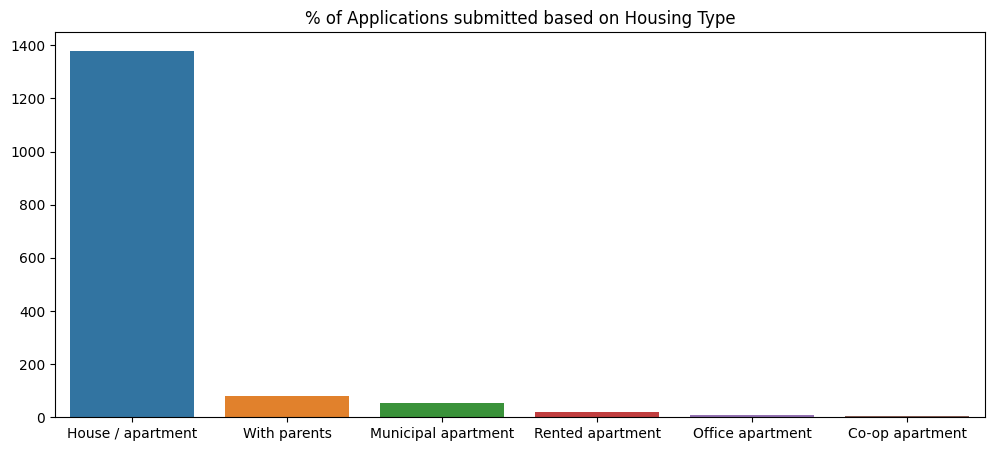

In [ ]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(x=join_data['Housing_type'].value_counts().index, y=join_data['Housing_type'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()


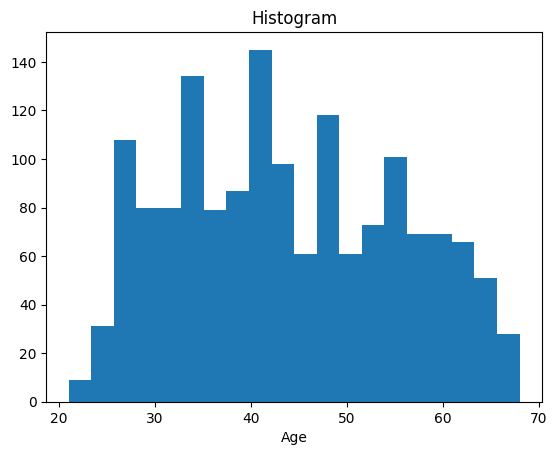

In [ ]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(join_data['AGE'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

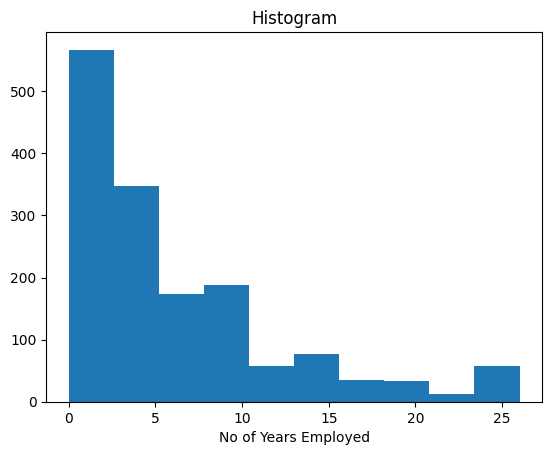

In [ ]:
# This graph shows that, majority of applicatant's are Employed for 0 to 10 years
plt.hist(join_data['YEAR_EMPLOYED'], bins=10)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

In [ ]:
join_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE,YEAR_EMPLOYED,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,Pensioner,2.0,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2.0,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,Unknown,2.0,1
3,5009749,F,Y,N,195394.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2.0,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2.0,1


###Encoding

In [ ]:
cat_columns = join_data.columns[(join_data.dtypes =='object').values].tolist()
cat_columns

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Type_Occupation']

In [ ]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        join_data[col] = globals()['LE_{}'.format(col)].fit_transform(join_data[col])
join_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE,YEAR_EMPLOYED,Type_Occupation,Family_Members,label
0,5008827,1,1,1,180000.0,1,1,1,1,51.0,0.0,12,2.0,1
1,5009744,0,1,0,315000.0,0,1,1,1,37.0,2.0,18,2.0,1
2,5009746,0,1,0,315000.0,0,1,1,1,44.0,2.0,18,2.0,1
3,5009749,0,1,0,195394.0,0,1,1,1,37.0,2.0,18,2.0,1
4,5009752,0,1,0,315000.0,0,1,1,1,37.0,2.0,18,2.0,1


In [ ]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

GENDER   :  ['F' 'M']
Car_Owner   :  ['N' 'Y']
Propert_Owner   :  ['N' 'Y']
Type_Income   :  ['Commercial associate' 'Pensioner' 'State servant' 'Working']
EDUCATION   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
Marital_status   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
Housing_type   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
Type_Occupation   :  ['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Pensioner'
 'Private service staff' 'Realty agents' 'Sales staff' 'Secretaries'
 'Security staff' 'Unknown' 'Waiters/barmen staff']


In [ ]:
join_data.corr()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE,YEAR_EMPLOYED,Type_Occupation,Family_Members,label
Ind_ID,1.000000,0.027597,-0.046811,-0.050421,0.007804,0.026832,0.020761,0.014426,0.024882,-0.022025,0.001698,0.001800,0.020478,0.016796
GENDER,0.027597,1.000000,0.366257,-0.038264,0.256974,0.061954,-0.034325,-0.120783,0.081154,-0.183135,-0.025230,-0.083036,0.096845,0.045664
Car_Owner,-0.046811,0.366257,1.000000,0.002401,0.234180,0.033180,-0.131209,-0.135318,-0.001358,-0.142936,-0.006679,-0.078538,0.119357,-0.014734
Propert_Owner,-0.050421,-0.038264,0.002401,1.000000,0.024442,-0.057481,-0.018622,0.004493,-0.174783,0.123679,-0.055736,0.004151,-0.010574,-0.017906
Annual_income,0.007804,0.256974,0.234180,0.024442,1.000000,-0.115998,-0.257999,-0.013822,0.021035,-0.108060,0.066598,-0.048204,0.048890,0.034179
Type_Income,0.026832,0.061954,0.033180,-0.057481,-0.115998,1.000000,0.100511,-0.032925,0.025516,-0.171505,0.184963,-0.142484,0.067976,-0.067856
EDUCATION,0.020761,-0.034325,-0.131209,-0.018622,-0.257999,0.100511,1.000000,0.051966,-0.044552,0.189292,0.018455,0.007640,-0.074409,-0.027040
Marital_status,0.014426,-0.120783,-0.135318,0.004493,-0.013822,-0.032925,0.051966,1.000000,-0.009247,0.115300,-0.100822,0.033525,-0.574837,0.057885
Housing_type,0.024882,0.081154,-0.001358,-0.174783,0.021035,0.025516,-0.044552,-0.009247,1.000000,-0.218762,-0.038571,-0.024982,0.004284,-0.001610
AGE,-0.022025,-0.183135,-0.142936,0.123679,-0.108060,-0.171505,0.189292,0.115300,-0.218762,1.000000,-0.037503,0.102825,-0.283925,0.044841


In [ ]:
features = join_data.drop(['label'], axis=1)
label = join_data['label']

In [ ]:
features.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE,YEAR_EMPLOYED,Type_Occupation,Family_Members
0,5008827,1,1,1,180000.0,1,1,1,1,51.0,0.0,12,2.0
1,5009744,0,1,0,315000.0,0,1,1,1,37.0,2.0,18,2.0
2,5009746,0,1,0,315000.0,0,1,1,1,44.0,2.0,18,2.0
3,5009749,0,1,0,195394.0,0,1,1,1,37.0,2.0,18,2.0
4,5009752,0,1,0,315000.0,0,1,1,1,37.0,2.0,18,2.0


In [ ]:
label.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

###Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state = 10)

###Feature Scaling

In [ ]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

###Balancing dataset

In [ ]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [ ]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    88.772213
1    11.227787
Name: label, dtype: float64

In [ ]:
# after using SMOTE
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: label, dtype: float64

##Machine Learning Model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#creating logistic regression object
log_model = LogisticRegression(random_state=0)
#passing independent and dependent training data into the model
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

#model to get prediction for test data
prediction = log_model.predict(x_test_oversam)

print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  62.22627737226277 %

Confusion matrix :
[[151 123]
 [ 84 190]]

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       274
           1       0.61      0.69      0.65       274

    accuracy                           0.62       548
   macro avg       0.62      0.62      0.62       548
weighted avg       0.62      0.62      0.62       548



### Decision Tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#create decision tree classifier object
decision_model = DecisionTreeClassifier(max_depth=13,criterion="entropy")

#train decision tree classifier
decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

#predict the response for test dataset
prediction = decision_model.predict(x_test_oversam)

print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  78.83211678832117 %

Confusion matrix :
[[232  42]
 [ 74 200]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       274
           1       0.83      0.73      0.78       274

    accuracy                           0.79       548
   macro avg       0.79      0.79      0.79       548
weighted avg       0.79      0.79      0.79       548



###Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=9,max_depth=13,criterion="entropy")

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  81.2043795620438 %

Confusion matrix :
[[253  21]
 [ 82 192]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       274
           1       0.90      0.70      0.79       274

    accuracy                           0.81       548
   macro avg       0.83      0.81      0.81       548
weighted avg       0.83      0.81      0.81       548



###Support Vector Machine classification

In [ ]:
from sklearn.svm import SVC

svc_model =SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  72.08029197080292 %

Confusion matrix :
[[206  68]
 [ 85 189]]

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       274
           1       0.74      0.69      0.71       274

    accuracy                           0.72       548
   macro avg       0.72      0.72      0.72       548
weighted avg       0.72      0.72      0.72       548



###K Nearest Neighbor classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors =3)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  71.35036496350365 %

Confusion matrix :
[[218  56]
 [101 173]]

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       274
           1       0.76      0.63      0.69       274

    accuracy                           0.71       548
   macro avg       0.72      0.71      0.71       548
weighted avg       0.72      0.71      0.71       548



###XGBoost  classification

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  88.13868613138686 %

Confusion matrix :
[[260  14]
 [ 51 223]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       274
           1       0.94      0.81      0.87       274

    accuracy                           0.88       548
   macro avg       0.89      0.88      0.88       548
weighted avg       0.89      0.88      0.88       548



Normalized confusion matrix


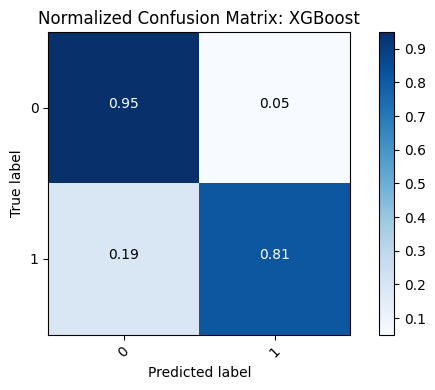

In [ ]:
cm = confusion_matrix(y_test_oversam, prediction)

# Class names
class_names = np.unique(y_test_oversam)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix: XGBoost')
plt.show()


##Validation

###K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

####Logistic Regression

In [ ]:
results=cross_val_score(log_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [88.70967742 88.70967742 88.70967742 88.67313916 88.67313916]
Avg accuracy : 88.69506211504333


#### Decision Tree classification

In [ ]:
results=cross_val_score(decision_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [81.61290323 79.35483871 81.61290323 82.20064725 82.84789644]
Avg accuracy : 81.52583777012214


####Random Forest classification

In [ ]:
results=cross_val_score(RandomForest_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [88.38709677 88.70967742 87.09677419 87.70226537 87.70226537]
Avg accuracy : 87.91961582628667


##### Support Vector Machine classification

In [ ]:
results=cross_val_score(svc_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [88.70967742 88.70967742 88.70967742 88.67313916 88.67313916]
Avg accuracy : 88.69506211504333


####K Nearest Neighbor classification

In [ ]:
results=cross_val_score(knn_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [82.90322581 84.51612903 83.87096774 83.81877023 85.7605178 ]
Avg accuracy : 84.17392212130703


####XGBoost classification

In [ ]:
results=cross_val_score(XGB_model,features,label,cv=kfold)
accuracy_score=results*100
print('accuracy of each fold - {}'.format(accuracy_score))

avg_accuracy_score=np.mean(results)*100
print('Avg accuracy : {}'.format(avg_accuracy_score))

accuracy of each fold - [86.77419355 86.77419355 87.41935484 86.40776699 87.05501618]
Avg accuracy : 86.886105021401
